In [48]:
import pandas as pd

sheet_dfs = []
excel_file = pd.ExcelFile('/home/broerman/ln/my_expdata/Plate Reader/DABs/20221027_FRET_CS201_DAB13_GB1-201Br1_binding.xlsx')
binding_df = pd.read_excel(excel_file, sheet_name=f"Plate 1 - Sheet1", skiprows=6, nrows=48, usecols="B:E")

/tmp/ipykernel_474144/4121769267.py:5: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  binding_df = pd.read_excel(excel_file, sheet_name=f"Plate 1 - Sheet1", skiprows=6, nrows=48, usecols="B:E")


In [49]:
combo_names = ["CS201+DAB13", "CS201+GB1-Br1"]
start_concs = [10, 10]

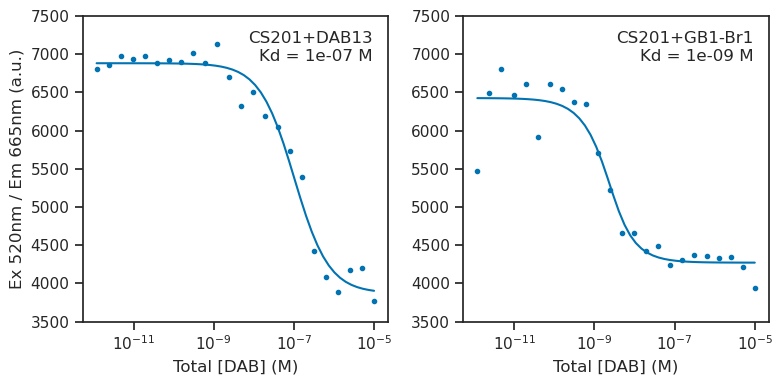

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(
    context="notebook",
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

from scipy.optimize import curve_fit
sign = -1
def binding_curve(Bt, S0, S1, Kd): 
    cst =  2
    fAB = (cst + Bt + Kd - np.sqrt((cst + Bt + Kd)**2 - 4*cst*Bt))/ (2 * cst)
    S = S0 + sign*S1*fAB
    return S

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

for j, (combo_name, start_conc, ax) in enumerate(zip(combo_names, start_concs, axs.flatten())):

    start_ind = j*24
    binding_data = binding_df.iloc[start_ind:start_ind+24, 1]
    s0 = np.array([start_conc*1000/(2**x) for x in range(24)])
    try:
        s0_guess = np.min(binding_data)
        s1_guess = binding_data.iloc[0]
        kd_guess = 1
        
        popt, pcov = curve_fit(
            binding_curve, 
            s0,
            binding_data, 
            p0 = [s0_guess, s1_guess, kd_guess], 
            bounds=([0, 0, 1e-3], [1e14, 1e15, 1e4])
        )  
        ax.plot(s0/1000000000, binding_data, '.', label='Data', color="C0")
        s0_plot = np.logspace(np.log10(s0[-1]), np.log10(s0[0]))
        ax.plot(s0_plot/1000000000, binding_curve(s0_plot, *popt), '-', label='Fit', zorder=-1, color="C0")
    except RuntimeError:
        print(f"{combo_name} fit failed")
    ax.set_xscale('log')
    ax.set_xlabel('Total [DAB] (M)')
    if j == 0:
        ax.set_ylabel('Ex 520nm / Em 665nm (a.u.)')
    else:
        ax.set_ylabel(None)
    ax.set_ylim(3500, 7500)
    # ax.set_title(f'{combo_name} | Kd = {popt[2]:.00f} nM')
    ax.text(0.95, 0.95, f'{combo_name}\nKd = {popt[2]/1000000000:.00e} M', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

fig.tight_layout()
fig.savefig("fret_binding_cs_201.png", dpi=300)

In [38]:
combo_names = ["CS221+DAB20", "CS221+DAB21", "CS221+PAB00", "CS221+GB1-B", "CS221_V149L+DAB20", "CS221_V149L+DAB21", "CS221_V149L+PAB00", "CS221_V149L+GB1-B"]
start_concs = [10, 10, 10, 10, 10, 10, 10, 10]

In [39]:
import pandas as pd

num_plates = (len(combo_names) - 1) // 4 + 1

sheet_dfs = []
excel_file = pd.ExcelFile('/home/broerman/ln/my_expdata/Plate Reader/DABs/20221027_FRET_CS221_DAB20_DAB21_PAB00_GB1-221B_binding.xlsx')
for i in range(1, num_plates+1):
    sheet_df = pd.read_excel(excel_file, sheet_name=f"Plate {i} - Sheet1", skiprows=6, nrows=96, usecols="B:E")
    sheet_dfs.append(sheet_df)
binding_df = pd.concat(sheet_dfs, axis=0, ignore_index=True)
binding_df

/tmp/ipykernel_474144/442507902.py:8: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  sheet_df = pd.read_excel(excel_file, sheet_name=f"Plate {i} - Sheet1", skiprows=6, nrows=96, usecols="B:E")
/tmp/ipykernel_474144/442507902.py:8: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  sheet_df = pd.read_excel(excel_file, sheet_name=f"Plate {i} - Sheet1", skiprows=6, nrows=96, usecols="B:E")


,Well,520665,520565
0,A1,6935,16485
1,A2,7727,18164
2,A3,7800,18205
3,A4,7998,18782
4,A5,7486,17921
...,...,...,...
187,H8,2694,25516
188,H9,2623,25142
189,H10,2685,25715
190,H11,2583,24632


In [40]:
print(binding_df[binding_df.Well == "E4"])


    Well  520665  520565
51    E4    8004   18306
147   E4    8965   42576


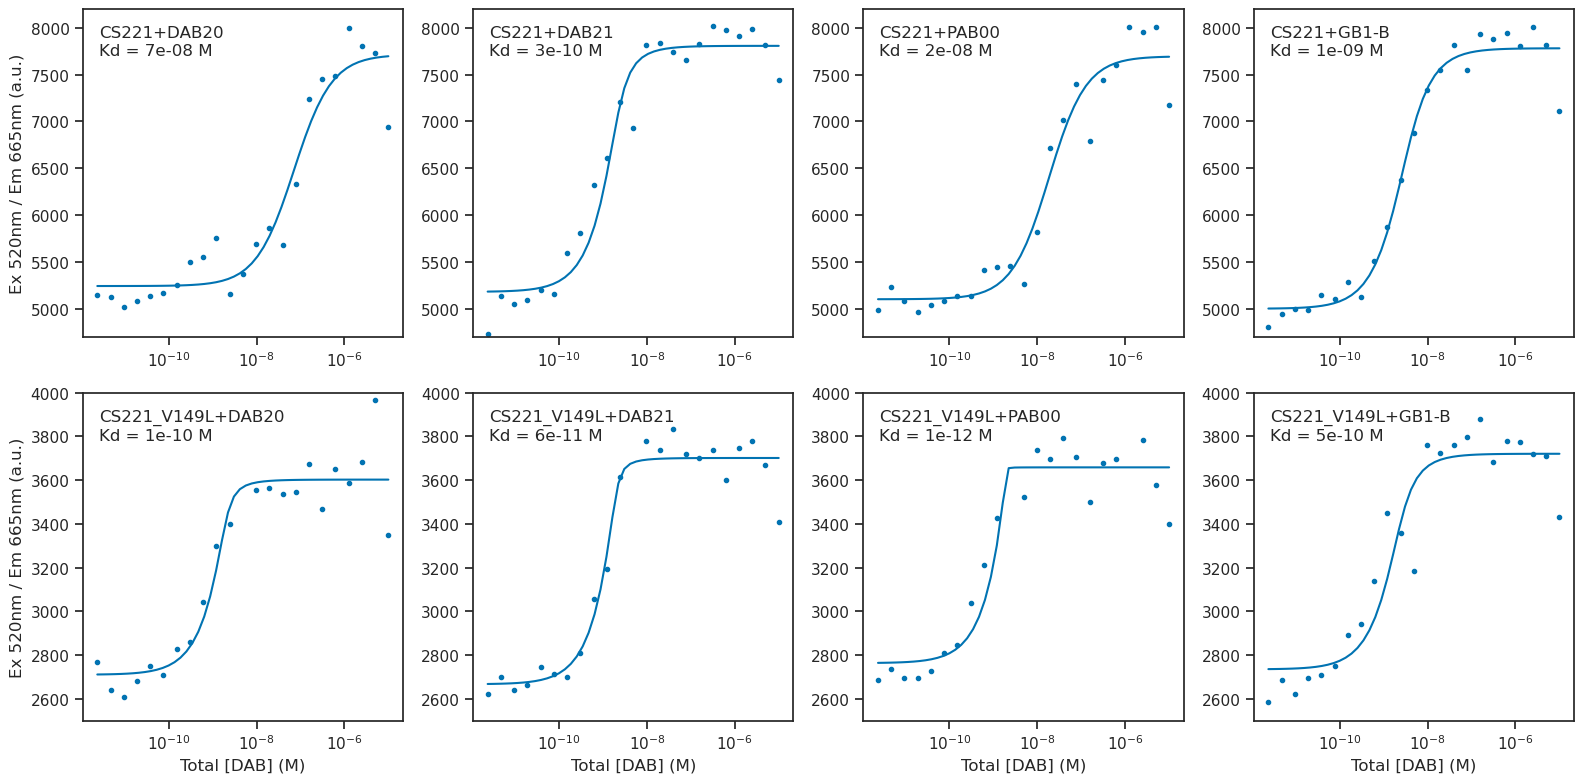

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(
    context="notebook",
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

from scipy.optimize import curve_fit
sign = 1
def binding_curve(Bt, S0, S1, Kd): 
    cst =  2
    fAB = (cst + Bt + Kd - np.sqrt((cst + Bt + Kd)**2 - 4*cst*Bt))/ (2 * cst)
    S = S0 + sign*S1*fAB
    return S

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

for j, (combo_name, start_conc, ax) in enumerate(zip(combo_names, start_concs, axs.flatten())):

    start_ind = j*24
    binding_data = binding_df.iloc[start_ind:start_ind+24, 1].reset_index(drop=True)
    s0 = np.array([start_conc*1000/(2**x) for x in range(24)])
    # remove outliers probably from a systematic error in the plate reader
    binding_data.drop(23, inplace=True)
    s0 = np.delete(s0, 23)
    if j == 4:
        binding_data.drop(11, inplace=True)
        s0 = np.delete(s0, 11)
    if j == 5:
        binding_data.drop(11, inplace=True)
        s0 = np.delete(s0, 11)
    if j == 6:
        binding_data.drop(3, inplace=True)
        s0 = np.delete(s0, 3)
        binding_data.drop(11, inplace=True)
        s0 = np.delete(s0, 11)
    try:
        s0_guess = np.min(binding_data)
        s1_guess = binding_data.iloc[0]
        kd_guess = 1
        
        popt, pcov = curve_fit(
            binding_curve, 
            s0,
            binding_data, 
            p0 = [s0_guess, s1_guess, kd_guess], 
            bounds=([0, 0, 1e-3], [1e14, 1e15, 1e4])
        )  
        ax.plot(s0/1000000000, binding_data, '.', label='Data', color="C0")
        s0_plot = np.logspace(np.log10(s0[-1]), np.log10(s0[0]))
        ax.plot(s0_plot/1000000000, binding_curve(s0_plot, *popt), '-', label='Fit', zorder=-1, color="C0")
    except RuntimeError:
        print(f"{combo_name} fit failed")
    ax.set_xscale('log')
    if j >= 4:
        ax.set_xlabel('Total [DAB] (M)')
    if j % 4 == 0:
        ax.set_ylabel('Ex 520nm / Em 665nm (a.u.)')
    else:
        ax.set_ylabel(None)
    if j < 4:
        ax.set_ylim(4700, 8200)
    else:
        ax.set_ylim(2500, 4000)
    # ax.set_title(f'{combo_name} | Kd = {popt[2]:.00f} nM')
    ax.text(0.05, 0.95, f'{combo_name}\nKd = {popt[2]/1000000000:.00e} M', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

fig.tight_layout()
fig.patch.set_alpha(0)
fig.savefig("fret_binding_cs_221.png", dpi=300)

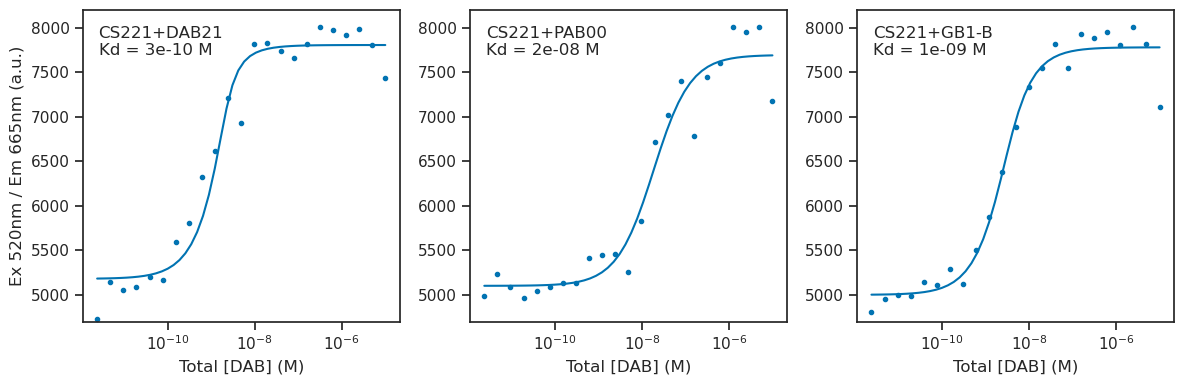

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(
    context="notebook",
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

from scipy.optimize import curve_fit
sign = 1
def binding_curve(Bt, S0, S1, Kd): 
    cst =  2
    fAB = (cst + Bt + Kd - np.sqrt((cst + Bt + Kd)**2 - 4*cst*Bt))/ (2 * cst)
    S = S0 + sign*S1*fAB
    return S

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax_i = 0
for j, (combo_name, start_conc) in enumerate(zip(combo_names, start_concs)):

    if j not in [1, 2, 3]:
        continue

    ax = axs[ax_i]
    ax_i += 1

    start_ind = j*24
    binding_data = binding_df.iloc[start_ind:start_ind+24, 1].reset_index(drop=True)
    s0 = np.array([start_conc*1000/(2**x) for x in range(24)])
    # remove outliers probably from a systematic error in the plate reader
    binding_data.drop(23, inplace=True)
    s0 = np.delete(s0, 23)
    if j == 4:
        binding_data.drop(11, inplace=True)
        s0 = np.delete(s0, 11)
    if j == 5:
        binding_data.drop(11, inplace=True)
        s0 = np.delete(s0, 11)
    if j == 6:
        binding_data.drop(3, inplace=True)
        s0 = np.delete(s0, 3)
        binding_data.drop(11, inplace=True)
        s0 = np.delete(s0, 11)
    try:
        s0_guess = np.min(binding_data)
        s1_guess = binding_data.iloc[0]
        kd_guess = 1
        
        popt, pcov = curve_fit(
            binding_curve, 
            s0,
            binding_data, 
            p0 = [s0_guess, s1_guess, kd_guess], 
            bounds=([0, 0, 1e-3], [1e14, 1e15, 1e4])
        )  
        ax.plot(s0/1000000000, binding_data, '.', label='Data', color="C0")
        s0_plot = np.logspace(np.log10(s0[-1]), np.log10(s0[0]))
        ax.plot(s0_plot/1000000000, binding_curve(s0_plot, *popt), '-', label='Fit', zorder=-1, color="C0")
    except RuntimeError:
        print(f"{combo_name} fit failed")
    ax.set_xscale('log')
    ax.set_xlabel('Total [DAB] (M)')
    if j == 1:
        ax.set_ylabel('Ex 520nm / Em 665nm (a.u.)')
    ax.set_ylim(4700, 8200)
    ax.text(0.05, 0.95, f'{combo_name}\nKd = {popt[2]/1000000000:.00e} M', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)

fig.tight_layout()
fig.patch.set_alpha(0)
fig.savefig("fret_binding_good_cs_221.png", dpi=300)